# tensorflow 2.x
- numpy, pandas, scikits, keras 의 장점 종합
- data : data, datasets, audio, image, strings, signal
- operations : math, linalg, sparce
- model : estimators, keras, optimizers, activation, cost, metrics

In [3]:
# eager mode 직접 실행모드
import tensorflow as tf
x = [[2.]]
m = tf.matmul(x, x) # 행렬곱 연산
print("결과 = {}".format(m)) # python core
print(type(m))
m.numpy()

결과 = [[4.]]
<class 'tensorflow.python.framework.ops.EagerTensor'>


array([[4.]], dtype=float32)

In [4]:
import numpy as np
print(x[0])
print(np.math.sin((x[0][0])))
print(tf.math.sin((x[0][0])).numpy())

[2.0]
0.9092974268256817
0.9092974


In [ ]:
# constant, variabies, placeholder(주입변수-입력데이터)

In [5]:
a = tf.constant(([1,2],
                [3,4]))
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [6]:
b = tf.add(a,1) # broadcastind
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [8]:
type(b)

tensorflow.python.framework.ops.EagerTensor

In [7]:
c = np.multiply(a,b)
print(c)
print(type(c))

[[ 2  6]
 [12 20]]
<class 'numpy.ndarray'>


In [13]:
# tensor와 numpy의 호환
def check_double(max_num):
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    for num in range(1, max_num.numpy()+1):
        num = tf.constant(num)
        if int(num % 3) == 0 and int(num % 5) == 0:
            print('3이나 5의 배수')
        elif int(num % 3) == 0:
            print("3의 배수")
        elif int(num % 5) == 0:
            print("5의 배수")
        else:
            print(num.numpy())
        counter +=1

In [14]:
check_double(15)

1
2
3의 배수
4
5의 배수
3의 배수
7
8
3의 배수
5의 배수
11
3의 배수
13
14
3이나 5의 배수


In [15]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()
# feeding
dataset = tf.data.Dataset.from_tensor_slices(
    #형변환 - 축이 증가, 컬러 정규화
    (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
    tf.cast(mnist_labels, tf.int64)))
dataset = dataset.shuffle(1000).batch(32) #32개씩 묵어서 feeding

In [16]:
# constant, Variables, placeholder
mnist_model = tf.keras.Sequential([
    # convolution operation
    tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                          input_shape=(None, None, 1)),
    tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(), # 차원율 감소 : 연산량이 줄고, 메모리이익, 속도가 빨라지고, 과적합 방지
    tf.keras.layers.Dense(10) # FFNN
])

In [ ]:
# 신경망
- 데이터 * 행렬 (tf. Variables = 공간확보)
- keras는 압축함수로 작저됨
- filter(3x3) - trainable
- Dense망에서 가중치 행렬

In [17]:
optimizer = tf.keras.optimizers.Adam()
# 0이 많다. : 검정 RGB = 1 하얀색
# 분류의 비용함수 실제값 : one-hot-encoding, 예측값 : softmax 확률값
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)

loss_history = []

In [21]:
#경사 하강법을 도입한 이유 : 정확한 해가 없어
    # 기울기 -> 미분 기울기 + => 가중치 - 역관계
    # 오차만큼 : 지그재그 : learing rate
#무작위 대입법, 경사하강법 -> 근사해를 구하기 위해
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training = True) # 확률 값
        tf.debugging.assert_equal(logits.shape, (32,10))
        loss_value = loss_object(labels, logits)  # cost 값
    loss_history.append(loss_value.numpy().mean()) # 평균값
    grads = tape.gradient(loss_value, mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(
        grads, mnist_model.trainable_variables))
def train():
    for epoch in range(3):
        for (batch, (images, labels)) in enumerate(dataset):
            train_step(images, labels)
        print("에포크 {} 종료".format(epoch))

In [22]:
train()

에포크 0 종료
에포크 1 종료
에포크 2 종료


Text(0, 0.5, 'Loss [entropy]')

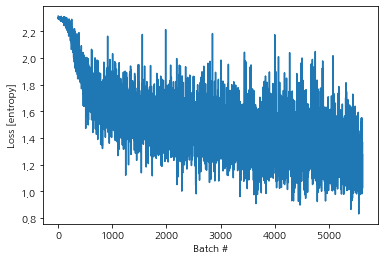

In [23]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

In [24]:
import tensorflow as tf
x = tf.ones((2,2))
with tf.GradientTape() as t: # 연산순서의 출력값을 기억하고 있다.
    t.watch(x)
    y = tf.reduce_sum(x) # reduce는 분산작업 결과를 합한다.
    z = tf.multiply(y, y) # 16 

In [25]:
# 미분을 이용해서 변화량을 구하는 함수
dz_dx = t.gradient(z, x) # 변수 x 에 대하여 z값의 도함수를 구하라.

In [26]:
print(dz_dx)
for i in [0,1]:
    for j in [0,1]:
        assert dz_dx[i][j].numpy() == 8.0

tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [32]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x * x  # x^2
    z = y * y  # x^4
dz_dx = t.gradient(z, x) # 4x^3
print(dz_dx)
dy_dx = t.gradient(y, x) # x^2 =>
print(dy_dx)

tf.Tensor(108.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [35]:
dataset = tf.data.Dataset.from_tensor_slices([8,3,0,8,2,1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [36]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


In [37]:
print(dataset.reduce(0, lambda state, value: state+value).numpy())

22


In [38]:
def count(stop):
    i = 0
    while i<stop:
        yield i # generator : 메모리 낭비가 심할 때 사용
        i += 1
        
for n in count(5):
    print(n)

0
1
2
3
4


In [39]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25],
        output_types=tf.int32, output_shapes = (), )

In [40]:
for count_batch in ds_counter.repeat().batch(10).take(10):
    print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


In [42]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_mujoco_ant', 'd4rl_mujoco_halfcheetah', 'dart', 'davis', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'dolp

In [43]:
dataset = tfds.load(name="mnist", split=tfds.Split.TRAIN)
dataset = dataset.shuffle(1024).batch(32).prefetch(
    tf.data.experimental.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset mnist downloaded and prepared to C:\Users\020\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [44]:
for features in dataset.take(1):
    image, label = features["image"], features["label"]

In [45]:
image

<tf.Tensor: shape=(32, 28, 28, 1), dtype=uint8, numpy=
array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
 

In [46]:
train, test = tf.keras.datasets.mnist.load_data()
train_x, train_y = train

dataset = tf.data.Dataset.from_tensor_slices(({"image":train_x}, train_y))
dataset = dataset.shuffle(100000).repeat().batch(10)

In [47]:
dataset.take(1)

<TakeDataset shapes: ({image: (None, 28, 28)}, (None,)), types: ({image: tf.uint8}, tf.uint8)>

In [49]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

32768/30874 [===============================] - 0s 0us/step


In [51]:
import pandas as pd
df=pd.read_csv(titanic_file, index_col=None)
df

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [52]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

for feature_batch in titanic_slices.take(1):
    for key, value in feature_batch.items():
        print(" {!r:20s}: {}".format(key, value))

 'survived'          : 0
 'sex'               : b'male'
 'age'               : 22.0
 'n_siblings_spouses': 1
 'parch'             : 0
 'fare'              : 7.25
 'class'             : b'Third'
 'deck'              : b'unknown'
 'embark_town'       : b'Southampton'
 'alone'             : b'n'


In [53]:
rng = np.random

In [54]:
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [55]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [56]:
# 회귀식 = 절편과 기울기
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
def linear_regression(x): # 모델
    return W * x + b # 1차 방정식
def mean_square(y_pred, y_true): # 오차값
    return tf.reduce_mean(tf.square(y_pred - y_true))
optimizer = tf.optimizers.SGD(learning_rate) # mini_batch

In [57]:
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [59]:
for step in range(1, training_steps + 1):
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(X) # 현재 상태까지의 모델
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.512660, W: 0.491768, b: -0.903636
step: 100, loss: 0.435239, W: 0.464288, b: -0.708816
step: 150, loss: 0.374524, W: 0.439953, b: -0.536290
step: 200, loss: 0.326909, W: 0.418403, b: -0.383508
step: 250, loss: 0.289569, W: 0.399319, b: -0.248209
step: 300, loss: 0.260286, W: 0.382418, b: -0.128394
step: 350, loss: 0.237321, W: 0.367452, b: -0.022289
step: 400, loss: 0.219312, W: 0.354198, b: 0.071673
step: 450, loss: 0.205188, W: 0.342461, b: 0.154883
step: 500, loss: 0.194112, W: 0.332068, b: 0.228570
step: 550, loss: 0.185426, W: 0.322863, b: 0.293825
step: 600, loss: 0.178615, W: 0.314712, b: 0.351613
step: 650, loss: 0.173273, W: 0.307494, b: 0.402787
step: 700, loss: 0.169083, W: 0.301102, b: 0.448105
step: 750, loss: 0.165798, W: 0.295441, b: 0.488238
step: 800, loss: 0.163222, W: 0.290428, b: 0.523777
step: 850, loss: 0.161201, W: 0.285989, b: 0.555250
step: 900, loss: 0.159617, W: 0.282057, b: 0.583121
step: 950, loss: 0.158374, W: 0.278576, b: 0.607803
step: 

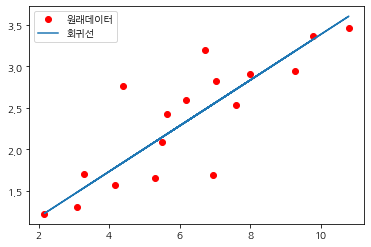

In [60]:
plt.plot(X, Y, 'ro', label='원래데이터')
plt.plot(X, np.array(W*X+b), label = '회귀선')
plt.legend()
plt.show()

In [85]:
num_classes = 10 # 숫자 분류 class 개수
num_features = 784 # 28x28

learning_rate = 0.01
training_steps = 1000
batch_size = 256 # 장
display_step = 50

In [86]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)  = mnist.load_data()
# 이미지 정규화를 위해서 부동소수점으로 변경
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# image를 flatten 시킴
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape(
    [-1, num_features])
x_train, x_test = x_train / 255 , x_test / 255

In [87]:
# 차원이 증가
# x_train = x_train[..., tf.newaxis]
# x_test = x_test[..., tf.newaxis]
# 동일한 사이즈로 feeding 준비
train_data = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
test_data = tf.data.Dataset.from_tensor_slices((
    x_test, y_test)).batch(32)

In [88]:
# 60000 x 784, 가중치 784 , x 10
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
# 값을 더해주는 역활 0
b = tf.Variable(tf.zeros([num_classes]), name="bias")
def logistic_regression(x): # 회귀 , 로지스틱 회귀 ( 출력값이 범주)
    return tf.nn.softmax(tf.matmul(x, W) + b) # 분류에서 확률값으로
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes) # 실제 값은 원핫
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.) #log 0은 무한대
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))
def accuracy(y_pred, y_true): # 인덱스가 곧 숫자를 의미
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(
        y_true, tf.int64)) # True(1)/False(0)
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
optimizer = tf.optimizers.SGD(learning_rate) # mini batch + gradient

In [125]:
def summarize_weights(step):
    tf.summary.histogram("weight", W, step = step)
    tf.summary.histogram("bias", b, step = step)

In [126]:
logs_path = '/temp/mnist_test'
summary_writer = tf.summary.create_file_writer(logs_path)

In [127]:
loss_history=[]

In [129]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x) # softmax
        loss = cross_entropy(pred, y) # cost function
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b])) # 학습률을 적용
for step, (batch_x, batch_y) in enumerate(train_data.take(
                training_steps), 1):
    tf.summary.trace_on(graph=True, profiler=True)
    run_optimization(batch_x, batch_y) # 가중치 학습
    with summary_writer.as_default():
        tf.summary.trace_export(
        name="trace", step=0, profiler_outdir=logs_path)
        
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" %(step, loss, acc))
        loss_history.append(loss.numpy().mean())
        with summary_writer.as_default():
            tf.summary.scalar('loss', loss, step=step)
            tf.summary.scalar('accuracy', acc, step=step)
            summarize_weights(step)
        

step: 50, loss: 1.291332, accuracy: 1.000000
step: 100, loss: 12.807297, accuracy: 0.906250
step: 150, loss: 7.075832, accuracy: 0.968750
step: 200, loss: 12.330854, accuracy: 0.906250
step: 250, loss: 1.940610, accuracy: 1.000000
step: 300, loss: 6.766716, accuracy: 0.968750
step: 350, loss: 3.667771, accuracy: 0.968750
step: 400, loss: 2.144307, accuracy: 0.968750
step: 450, loss: 2.844511, accuracy: 0.968750
step: 500, loss: 5.091793, accuracy: 0.968750
step: 550, loss: 4.758109, accuracy: 0.968750
step: 600, loss: 9.039463, accuracy: 0.937500
step: 650, loss: 5.583480, accuracy: 0.968750
step: 700, loss: 3.775444, accuracy: 0.937500
step: 750, loss: 6.971866, accuracy: 0.968750
step: 800, loss: 10.156666, accuracy: 0.906250
step: 850, loss: 3.961242, accuracy: 0.968750
step: 900, loss: 6.023089, accuracy: 0.968750
step: 950, loss: 14.624345, accuracy: 0.843750
step: 1000, loss: 5.211216, accuracy: 0.937500


In [ ]:
# 문제 :
- test 정확도를 출력하시오
- test 데이터의 앞의 5장을 취하고 이미지를 출력하고 그에 대한 예측된 번호를 출력하시오

In [113]:
aaa = []

In [122]:
pred = logistic_regression(x_test)
print("accuracy: %f" %accuracy(pred,y_test))

accuracy: 0.933000


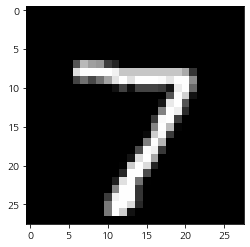

모델 예측 결과 : 7 


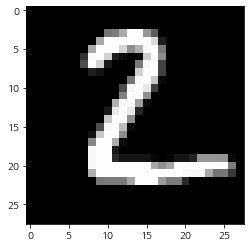

모델 예측 결과 : 2 


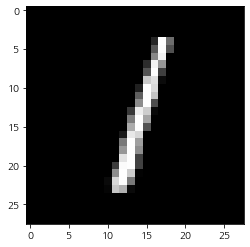

모델 예측 결과 : 1 


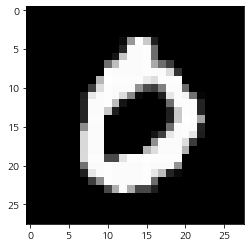

모델 예측 결과 : 0 


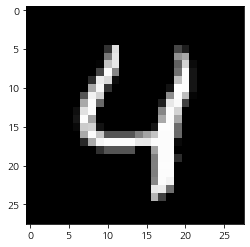

모델 예측 결과 : 4 


In [123]:
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28,28]), cmap='gray')
    plt.show()
    print("모델 예측 결과 : %i " % tf.argmax(predictions[i]))

Text(0, 0.5, 'Loss [entroy]')

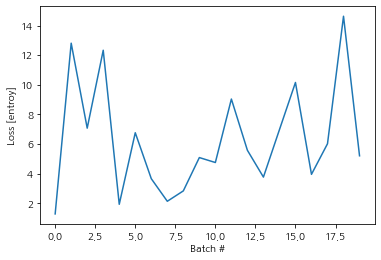

In [130]:
plt.plot(loss_history)
plt.xlabel("Batch #")
plt.ylabel('Loss [entroy]')

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy
import pandas as pd

numpy.random.seed(3)
tf.random.set_seed(3)
df = pd.read_csv('./sonar.csv', header=None)

In [19]:
dataset = df.values
X = dataset[:,0:60] # 독립 60, 종속 1

import numpy as np
X = np.asarray(X).astype(np.float32)

Y_obj = dataset[:,60] 
e = LabelEncoder() # R/M 광석 분류 문제
e.fit(Y_obj)
Y = e.transform(Y_obj)
model = Sequential()
# 자동으로 가중치 행렬과 바이어스 공간 확보
# 공간계산
model.add(Dense(24, input_dim=60, activation='relu')) # 60x24 + 24
model.add(Dense(10, activation='relu')) # 24x10 + 10
model.add(Dense(1, activation='sigmoid')) # 10 x 1
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])
history=model.fit(X, Y, epochs=200, batch_size=5) # for 문
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
42/42 [==============================] - 0s 693us/step - loss: 0.2432 - accuracy: 0.5865
Epoch 2/200
42/42 [==============================] - 0s 690us/step - loss: 0.2288 - accuracy: 0.6394
Epoch 3/200
42/42 [==============================] - 0s 690us/step - loss: 0.2187 - accuracy: 0.6490
Epoch 4/200
42/42 [==============================] - 0s 738us/step - loss: 0.2031 - accuracy: 0.7260
Epoch 5/200
42/42 [==============================] - 0s 738us/step - loss: 0.1893 - accuracy: 0.7692
Epoch 6/200
42/42 [==============================] - 0s 738us/step - loss: 0.1802 - accuracy: 0.7596
Epoch 7/200
42/42 [==============================] - 0s 690us/step - loss: 0.1677 - accuracy: 0.7740
Epoch 8/200
42/42 [==============================] - 0s 714us/step - loss: 0.1590 - accuracy: 0.7837
Epoch 9/200
42/42 [==============================] - 0s 690us/step - loss: 0.1558 - accuracy: 0.7885
Epoch 10/200
42/42 [==============================] - 0s 714us/step - loss: 0.1483 - accura

42/42 [==============================] - 0s 715us/step - loss: 0.0073 - accuracy: 0.9952
Epoch 161/200
42/42 [==============================] - 0s 714us/step - loss: 0.0076 - accuracy: 0.9952
Epoch 162/200
42/42 [==============================] - 0s 714us/step - loss: 0.0071 - accuracy: 0.9952
Epoch 163/200
42/42 [==============================] - 0s 690us/step - loss: 0.0099 - accuracy: 0.9952
Epoch 164/200
42/42 [==============================] - 0s 717us/step - loss: 0.0088 - accuracy: 0.9952
Epoch 165/200
42/42 [==============================] - 0s 714us/step - loss: 0.0073 - accuracy: 0.9952
Epoch 166/200
42/42 [==============================] - 0s 733us/step - loss: 0.0073 - accuracy: 0.9952
Epoch 167/200
42/42 [==============================] - 0s 714us/step - loss: 0.0070 - accuracy: 0.9952
Epoch 168/200
42/42 [==============================] - 0s 714us/step - loss: 0.0079 - accuracy: 0.9952
Epoch 169/200
42/42 [==============================] - 0s 686us/step - loss: 0.0068 - a

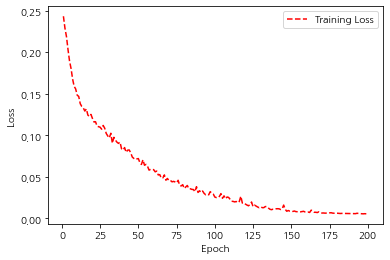

In [21]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

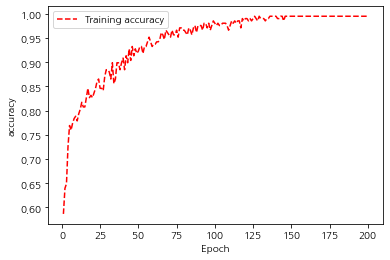

In [22]:
training_accuracy = history.history['accuracy']
epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count, training_accuracy, 'r--')
plt.legend(['Training accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

In [23]:
model.save('my_model.h5') # HDFS
from tensorflow.keras.models import load_model
del model
model = load_model('my_model.h5')
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
# keras의 parameter tuning : scikits의 GridSearchCV

In [7]:
import pandas
import numpy
from tensorflow.keras.models import Sequential # 순차성
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor # 매핑객체 (keras 모델 -> scikits의 gridserachCV를 사용)
from sklearn.model_selection import cross_val_score # 평가
from sklearn.model_selection import KFold # cv
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam
dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
X = dataset[:,0:13]
Y = dataset[:,13]
def baseline_model(lr=0.1, beta_1=0.9): # 함수로 모델을 구현
    optimizer = Adam(lr=lr, beta_1=beta_1)
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal',
                   activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model
seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("결과 평균과 표준편차 : %.2f (%.2f) MSE" %(results.mean(), results.std()))
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler())) # 정규화
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10,shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE " % (results.mean(), results.std()))
pipeline.fit(X,Y)
pipeline.predict(X[0:5])

결과 평균과 표준편차 : -161.26 (106.23) MSE
Standardized: -18.20 (8.71) MSE 


array([22.299416, 21.680027, 30.336107, 30.00816 , 30.335745],
      dtype=float32)

In [ ]:
from sklearn.model_selection import GridSearchCV
batch_size = [10,20,40,60,80,100]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1,0.2,0.3]
momentum = [0.5,0.6,0.7,0.8,0.9]
param_grid = dict(mlp__batch_size=batch_size, mlp__epochs=epochs, mlp__lr=learing_rate, mlp__beta_1=momentum)
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
print("최적스코어 : %f 사용한 파라미터조합 : %s" %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" %(mean, stdev, param))

In [10]:
param_grid = dict(mlp__batch_size=batch_size, mlp__epochs=epochs)
param_grid

{'mlp__batch_size': [10, 20, 40, 60, 80, 100], 'mlp__epochs': [10, 50, 100]}

In [ ]:
# 과제
- http://media.daum.net/ranking/popular/ 뉴스제목하고 신문사명을 크롤링해서 csv로 저장 (코드 작성)
- learning-rate, momentum에 대한 parameter tuing하는 과정을 구현하시오

In [13]:
import sklearn
sklearn.__version__

'0.24.1'

In [25]:
import markdown
markdown.__version__

'3.3.4'

In [ ]:
url = "https://www.koreabaseball.com/Record/Team/Hitter/Basic1.aspx"
print(url)
hp = HTMLParser()

In [11]:
import numpy as np

from tensorflow.keras.models import Sequential
# channel, fillter, kernel, stride, padding
# 마지막이 FFNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 정규화 -> -0.5 ~ 0.5 학습이 용이
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5
# 원래 이미지 3차원 흑백 1바이트 60000X28X28 X1
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
num_filters = 8 # 필터의 개수
filter_size = 3 # 사이즈 3X3
pool_size = 2 #  합침

In [17]:
model = Sequential([
    #1장의 사이즈를 기재
    Conv2D(num_filters, filter_size, input_shape=(28,28,1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(), # FFNN fully-connected
    Dense(10, activation='softmax') #확률값
])

model.compile(
    'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
model.fit(# train, validation, test
    train_images,
    to_categorical(train_labels), # 0.1
    epochs=3,
    validation_data=(test_images, to_categorical(test_labels))
)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3505 - accuracy: 0.8989 - val_loss: 0.2075 - val_accuracy: 0.9415
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1882 - accuracy: 0.9456 - val_loss: 0.1544 - val_accuracy: 0.9519
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1415 - accuracy: 0.9599 - val_loss: 0.1226 - val_accuracy: 0.9631
